In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#データ読み込み
df = pd.read_csv('medical_checkup.csv')

#欠損値処理(データが大量なので、欠損値を一つでも含むデータはドロップ)
df1 = df.dropna()

# 各列の最大値を計算
max_values = df1.max()

# 各列の最小値を計算
min_values = df1.min()

print('各列の最大値:', max_values)
print('各列の最小値:', min_values)

df1.info()

各列の最大値: uid                   FFFC1701B1AD1942F88A77C845A9C0D9E5EA9F051B17E3...
visits_day                                                   2017-03-31
sex                                                                   2
age                                                                  75
bmi                                                                39.8
ldl                                                                 361
hdl                                                                 240
sbp                                                                 230
dbp                                                                 140
a1c                                                                  97
history_of_cva_ihd                                                    1
take_medicine                                                         1
outcome                                                               1
dtype: object
各列の最小値: uid                   00000634A9F2

In [2]:
#性別の変数の型がfloatであったためintに変換
df1['sex'] = df1['sex'].astype('int64')

#性別も0(男性)か1(女性)に変換
df1['sex'][df1['sex'] == 1] = 0
df1['sex'][df1['sex'] == 2] = 1

df1.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,uid,visits_day,sex,age,bmi,ldl,hdl,sbp,dbp,a1c,history_of_cva_ihd,take_medicine,outcome
0,279FADA581052E2061C84BCE69FBD64565028855821BC7...,2016-12-14,0,46.0,26.8,114.0,39.0,117.0,68.0,5.4,0,0,0
1,C497563079F10329FD55B3AC1E654D14680FC7802529CA...,2016-04-15,1,47.0,19.1,93.0,59.0,106.0,66.0,5.7,0,0,0
2,F280A81F4EDAB876DA98C2A439F1A06CC46CDFADAA0927...,2016-04-19,1,57.0,21.9,169.0,53.0,102.0,72.0,5.5,0,0,0
3,1E0B28248767BA32795AF934819EAD9A6C983CCBAAE0A9...,2016-04-25,1,42.0,20.4,78.0,66.0,102.0,52.0,5.0,0,0,0
4,02FF755BEED04A9A2EBEAA304AEB9CE718CAC1CE0F903F...,2016-05-15,1,44.0,21.8,95.0,72.0,110.0,71.0,4.8,0,0,0


In [3]:
#HbA1cが97と、sbpが10は明らかに外れ値なので、それを除外
df1 = df1[(df1['a1c']<96)]
df1 = df1[(df1['sbp']>10)]


# 各列の最大値を計算
max_values = df1.max()

# 各列の最小値を計算
min_values = df1.min()

print('各列の最大値:', max_values)
print('各列の最小値:', min_values)

df1.info()

各列の最大値: uid                   FFFC1701B1AD1942F88A77C845A9C0D9E5EA9F051B17E3...
visits_day                                                   2017-03-31
sex                                                                   1
age                                                                  75
bmi                                                                39.8
ldl                                                                 361
hdl                                                                 240
sbp                                                                 230
dbp                                                                 140
a1c                                                                16.7
history_of_cva_ihd                                                    1
take_medicine                                                         1
outcome                                                               1
dtype: object
各列の最小値: uid                   00000634A9F2

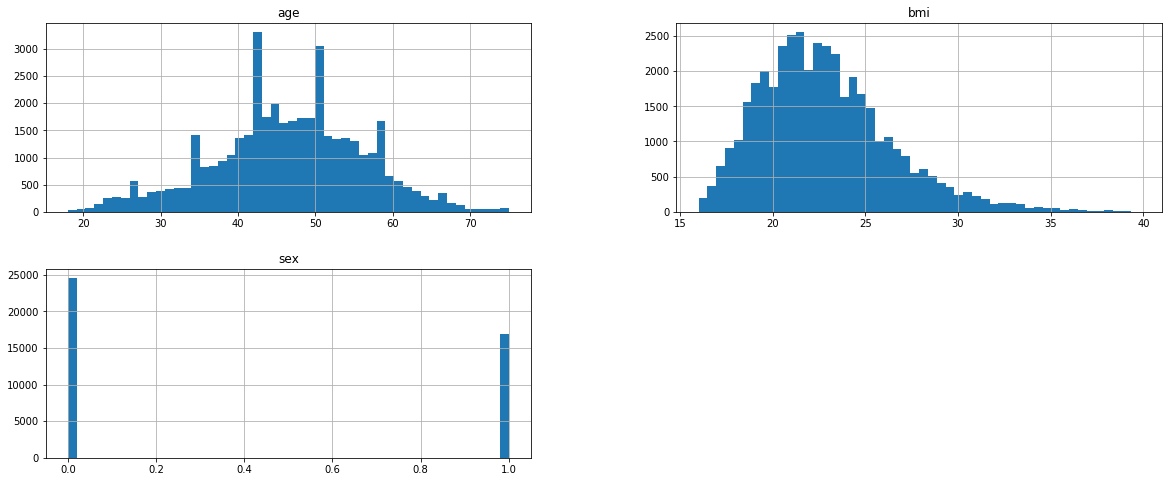

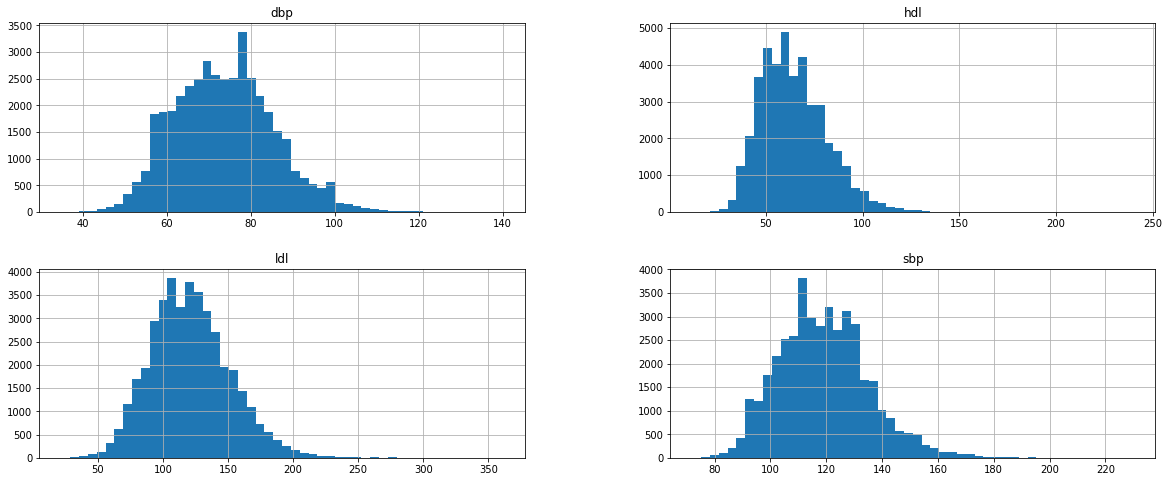

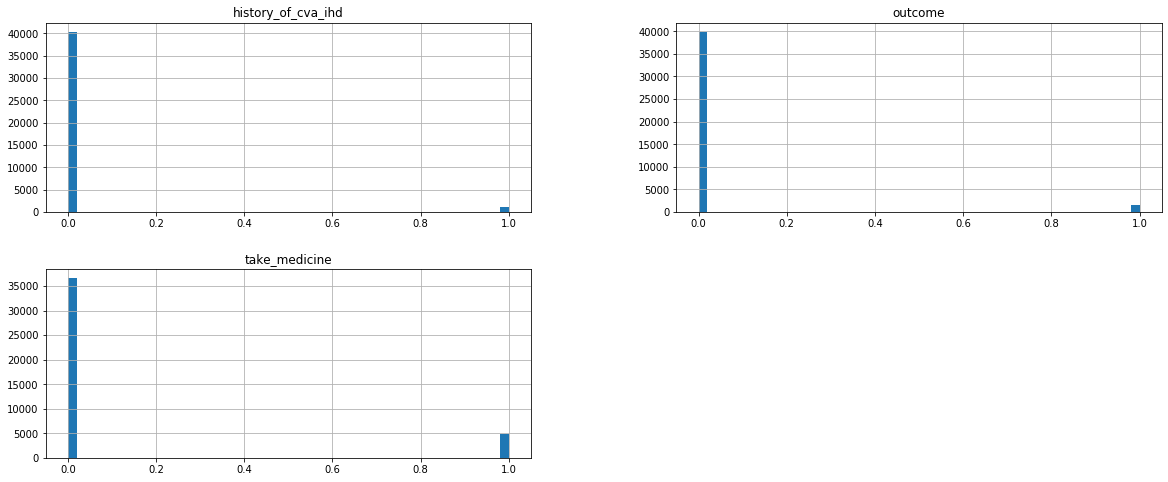

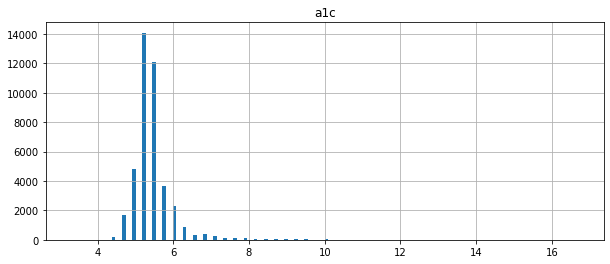

In [4]:
# 各項目のヒストグラムを描画

df1[['sex','age','bmi']].hist(figsize=(20, 8), bins=50)
df1[['ldl','hdl','dbp','sbp']].hist(figsize=(20, 8), bins=50)
df1[['outcome','take_medicine','history_of_cva_ihd']].hist(figsize=(20, 8), bins=50)
df1[['a1c']].hist(figsize=(10, 4), bins=50,width=0.1)
plt.show()

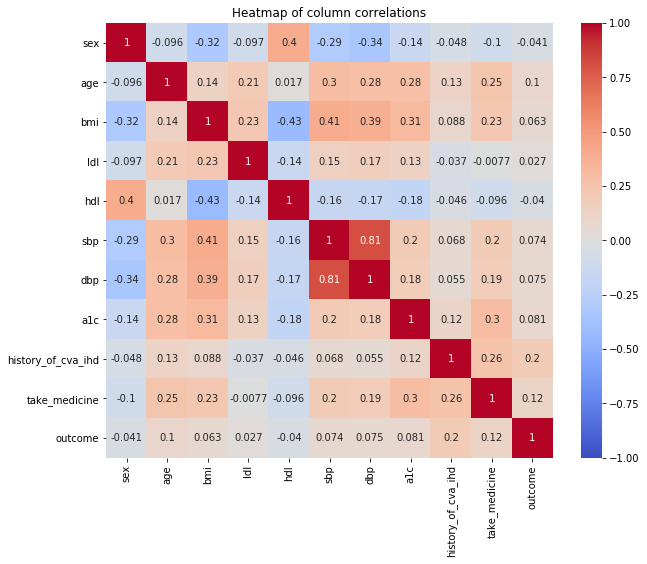

P-values:
                    sex    age    bmi    ldl    hdl    sbp    dbp    a1c  \
sex                 NaN  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
age                 NaN    NaN  0.000  0.000  0.001  0.000  0.000  0.000   
bmi                 NaN    NaN    NaN  0.000  0.000  0.000  0.000  0.000   
ldl                 NaN    NaN    NaN    NaN  0.000  0.000  0.000  0.000   
hdl                 NaN    NaN    NaN    NaN    NaN  0.000  0.000  0.000   
sbp                 NaN    NaN    NaN    NaN    NaN    NaN  0.000  0.000   
dbp                 NaN    NaN    NaN    NaN    NaN    NaN    NaN  0.000   
a1c                 NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
history_of_cva_ihd  NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
take_medicine       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
outcome             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                   history_of_cva_ihd take_medicine outcome  
sex            

In [5]:
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

# 相関係数とp値の計算
corr = df1.corr()
p_values = pd.DataFrame(index=corr.columns, columns=corr.index)
for i, col in enumerate(corr.columns):
    for j, row in enumerate(corr.index):
        if i < j:
            corr_val, p_val = pearsonr(df1[col], df1[row])
            p_values.loc[col, row] = f'{p_val:.3f}'

# ヒートマップの描画
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1)
plt.title('Heatmap of column correlations')
plt.show()

# p値の表形式出力
print('P-values:')
print(p_values)
p_values.to_csv('相関係数のp値.csv', encoding='utf-8-sig', index=True)


In [6]:
#全データの平均と分散を計算する
mean = df1.mean()
sd = df1.std()

# 結果をデータフレームにまとめる
result_df = pd.DataFrame({'平均': mean, '標準偏差': sd})

# 結果をcsvファイルに書き込む
result_df.to_csv('平均と標準偏差.csv', encoding='utf-8-sig', index=True)

# 結果を表示する
print(result_df)

                            平均       標準偏差
sex                   0.407288   0.491335
age                  46.460476   9.799234
bmi                  22.830824   3.583091
ldl                 121.071336  30.798770
hdl                  64.340194  17.004602
sbp                 118.941076  16.126661
dbp                  73.686509  11.822601
a1c                   5.549852   0.606599
history_of_cva_ihd    0.028076   0.165193
take_medicine         0.115125   0.319177
outcome               0.039307   0.194326


In [7]:
#5年以内の脳血管・心血管病を発症した群(発症群、outcome=1)としなかった群(無発症群、outcome=0)を分けた考察

#outocomeが0と1のデータを抽出し別々のデータフレームに格納
df_healthy = df1[df1['outcome'] == 0]
df_disease = df1[df1['outcome'] == 1]

df_healthy.info()
df_disease.info()

#発症群と無発症群とで別々に平均値と標準偏差を出す
mean_healthy = df_healthy.mean()
sd_healthy = df_healthy.std()

mean_disease = df_disease.mean()
sd_disease = df_disease.std()

# 結果をデータフレームにまとめる
r_df_healthy = pd.DataFrame({'平均': mean_healthy, '標準偏差': sd_healthy})
r_df_disease = pd.DataFrame({'平均': mean_disease, '標準偏差': sd_disease})

# 結果をcsvファイルに書き込む
r_df_healthy.to_csv('平均と標準偏差(無発症群).csv', encoding='utf-8-sig', index=True)
r_df_disease.to_csv('平均と標準偏差(発症群).csv', encoding='utf-8-sig', index=True)

# 結果を表示する
print(r_df_healthy)
print(r_df_disease)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39863 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   uid                 39863 non-null  object 
 1   visits_day          39863 non-null  object 
 2   sex                 39863 non-null  int64  
 3   age                 39863 non-null  float64
 4   bmi                 39863 non-null  float64
 5   ldl                 39863 non-null  float64
 6   hdl                 39863 non-null  float64
 7   sbp                 39863 non-null  float64
 8   dbp                 39863 non-null  float64
 9   a1c                 39863 non-null  float64
 10  history_of_cva_ihd  39863 non-null  int64  
 11  take_medicine       39863 non-null  int64  
 12  outcome             39863 non-null  int64  
dtypes: float64(7), int64(4), object(2)
memory usage: 4.3+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1631 entries, 9 to 49965
Data columns (total

In [8]:
#説明変数を標準化
from sklearn.preprocessing import StandardScaler


# 標準化する列を選択
cols_to_scale = ['sex','age','bmi','ldl','hdl','dbp', 'sbp','a1c', 'take_medicine',
         'history_of_cva_ihd']

# StandardScalerをインスタンス化する
scaler = StandardScaler()

# 選択した列の値を標準化する
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [9]:
#全ての説明変数を投入した場合のロジスティック回帰モデル
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

#説明変数と目的変数の指定

#全説明変数を投入
X = df1[['sex','age','bmi','ldl','hdl','sbp','dbp','a1c', 'take_medicine',
         'history_of_cva_ihd']]
y = df1['outcome']

#ロジスティック回帰モデル作成
model = LogisticRegression(penalty='l2')
model.fit(X, y)

X1 = sm.add_constant(X)
logit_model = sm.Logit(y, X1)
result = logit_model.fit(method='bfgs')
p_values = result.pvalues[1:]

# 結果の表示
print('係数:', model.coef_)
print('切片:', model.intercept_)
print('決定係数:', model.score(X, y))
print('p値:', p_values)
print('AIC:', result.aic)

         Current function value: 0.150750
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
係数: [[-0.02547682  0.34127541  0.02393183  0.09773975 -0.08623917 -0.02063858
   0.21244961  0.06324982  0.15996828  0.29831117]]
切片: [-3.47405897]
決定係数: 0.9605726129078903
p値: sex                    4.383590e-01
age                    6.117685e-29
bmi                    4.101324e-01
ldl                    4.105399e-04
hdl                    3.836957e-03
sbp                    7.613584e-01
dbp                    4.295044e-06
a1c                    3.338194e-03
take_medicine          2.422576e-13
history_of_cva_ihd    2.689400e-110
dtype: float64
AIC: 12532.445176841622


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
import itertools

#AICを最小にする説明変数の組み合わせを探す
#組み合わせを生成
X_columns = ['sex','age','bmi','dbp','sbp','hdl','ldl','a1c','take_medicine',
             'history_of_cva_ihd']
combinations = []
for r in range(1, len(X_columns) + 1):
    combinations.extend(itertools.combinations(X_columns, r))

# AICを計算
aic_dict = {}
for combination in combinations:
    X = sm.add_constant(df1[list(combination)])
    logit_model = sm.Logit(y, X)
    result = logit_model.fit(method='bfgs')
    aic_dict[combination] = result.aic

# AICが最小となる組み合わせを探す
min_aic = min(aic_dict.values())
min_aic_combinations = [k for k, v in aic_dict.items() if v == min_aic]

print('AICが最小となる説明変数の組み合わせ:', min_aic_combinations, min_aic)

In [10]:
#AICを最小にするよう組み合わせられた説明変数を投入した場合のロジスティック回帰モデル
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

#説明変数と目的変数の指定

#AICを最小にするような変数の組み合わせ
X = df1[['age','ldl','hdl','dbp','a1c', 'take_medicine',
         'history_of_cva_ihd']]
y = df1['outcome']

#ロジスティック回帰モデル作成
model = LogisticRegression(penalty='l2')
model.fit(X, y)

X1 = sm.add_constant(X)
logit_model = sm.Logit(y, X1)
result = logit_model.fit(method='bfgs')
p_values = result.pvalues[1:]

# 結果の表示
print('係数:', model.coef_)
print('切片:', model.intercept_)
print('決定係数:', model.score(X, y))
print('p値:', p_values)
print('AIC:', result.aic)

Optimization terminated successfully.
         Current function value: 0.150767
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
係数: [[ 0.33741235  0.09852821 -0.10341782  0.20763701  0.06672009  0.1621223
   0.29897317]]
切片: [-3.472338]
決定係数: 0.9605485130380296
p値: age                    4.089530e-29
ldl                    1.543442e-04
hdl                    2.181208e-04
dbp                    1.384684e-14
a1c                    1.234331e-03
take_medicine          3.313696e-14
history_of_cva_ihd    3.395418e-112
dtype: float64
AIC: 12527.873774560783
